In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
from datetime import datetime
import requests
import os
import json
from dotenv import load_dotenv
import matplotlib
import matplotlib.pyplot as plt
import warnings

from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/draganbogatic/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
FMP_API_KEY = os.getenv('FMP_API_KEY')

In [4]:
company = 'TSM'

# Article Sentiment

In [5]:
# Pull company articles
url = f'https://financialmodelingprep.com/api/v3/stock_news?tickers={company}&limit=100&apikey={FMP_API_KEY}'
articles = requests.get(url).json()
articles = pd.DataFrame(articles)
articles['publishedDate'] = pd.to_datetime(articles['publishedDate'])
articles.head(1)

,symbol,publishedDate,title,image,site,text,url
0,TSM,2021-09-29 18:07:17,Why China (Probably) Won't Go To War Over Taiw...,https://cdn.snapi.dev/images/v1/g/p/why-china-...,Forbes,"Is military action by China, aimed annexing Ta...",https://www.forbes.com/sites/georgecalhoun/202...


In [6]:
# Preview articles
pd.set_option('display.max_colwidth', None) 
articles['text'][:10]

0                                                                                                                                                                           Is military action by China, aimed annexing Taiwan and taking control of Taiwanese semiconductor assets, likely? Is it feasible?
1                                                                                                                                                                                                 TSMC (TSM) closed the most recent trading day at $116.15, moving +0.44% from the previous trading session.
2                                                                                                       Taiwan's TSMC said on Friday it is actively supporting and working with all stakeholders to overcome a global semiconductor shortage, after its participation at a White House meeting on the issue.
3                                                                 It's rare for a stock to be abl

In [7]:
# Calculate sentoment scores for articles
scores = []
text = articles['text']

for txt in text:

    vs = analyzer.polarity_scores(txt)
    scores.append(vs)

text_df = pd.DataFrame(text, columns=['text'])
scores_df = pd.DataFrame(scores)
sentiment_df = pd.concat([text_df, scores_df], axis=1)

combined_df = pd.concat([sentiment_df,articles],axis=1)
combined_df = combined_df.T.drop_duplicates().T.set_index('publishedDate')
combined_df.head(1)


,text,neg,neu,pos,compound,symbol,title,image,site,url
publishedDate,,,,,,,,,,
2021-09-29 18:07:17,"Is military action by China, aimed annexing Taiwan and taking control of Taiwanese semiconductor assets, likely? Is it feasible?",0,0.897,0.103,0.264,TSM,Why China (Probably) Won't Go To War Over Taiwan's Semiconductor Riches,https://cdn.snapi.dev/images/v1/g/p/why-china-probably-wont-go-to-war-over-taiwans-semiconductor-riches-1028406.jpg,Forbes,https://www.forbes.com/sites/georgecalhoun/2021/09/29/why-china-probably-wont-go-to-war-over-taiwans-semiconductor-riches/


            neg      neu      pos  compound
symbol                                     
TSM     0.03037  0.86129  0.10832  0.220939


<AxesSubplot:title={'center':'TSM Sentiment Analysis'}, xlabel='symbol', ylabel='sentiment'>

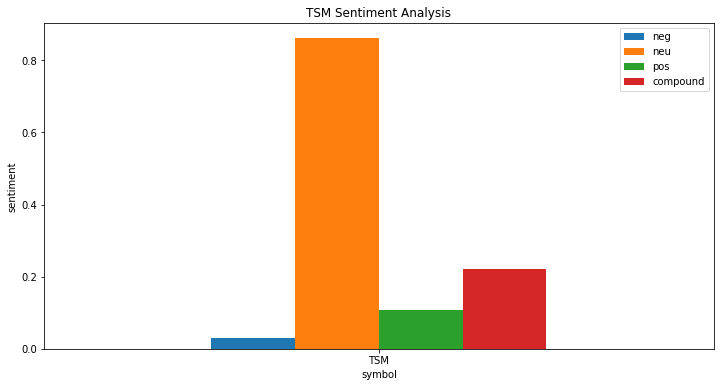

In [8]:
# Plot mean sentiment
scores_df['symbol'] = company
scores_df
scores_mean = scores_df.groupby('symbol').mean()
print(scores_mean)
scores_mean.plot.bar(figsize=(12,6),title=f'{company} Sentiment Analysis',ylabel='sentiment', rot=0)

# Press Releases

In [9]:
# Pull company press releases
url = f'https://financialmodelingprep.com/api/v3/press-releases/{company}?limit=100&apikey={FMP_API_KEY}'
press = requests.get(url).json()
press = pd.DataFrame(press)
press['publishedDate'] = pd.to_datetime(articles['publishedDate'])
press['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                    HSINCHU, TAIWAN--(BUSINESS WIRE)--TSMC COMMITS TO REACH NET ZERO EMISSIONS BY 2050.
1                                                                                                                                                                                                                                                                                                                                                                                                                    HSINCHU, TAIWAN--(BUSINESS WIRE)--TSMC UNVEILS INNOVATIONS AT THE 2021 ONLINE TECHNOLOGY S

# Social Sentiment

In [10]:
# Absolute index field indicates how much people are talking about the stock, relative index also indicates it ​but relative to previous day. 
# Sentiment field indicates overall percentage of positive activity, while general perception indicates whether people are more positive or negative than usual.
url = f'https://financialmodelingprep.com/api/v4/social-sentiment?symbol={company}&limit=100&apikey={FMP_API_KEY}'
social_sentiment = requests.get(url).json()
social_sentiment = pd.DataFrame(social_sentiment)
social_sentiment['date'] = pd.to_datetime(social_sentiment['date'])
social_sentiment = social_sentiment.set_index('date')
social_sentiment.head()


,symbol,absoluteIndex,relativeIndex,generalPerception,sentiment,redditPostMentions,redditPostSentiment,redditCommentMentions,redditCommentSentiment,tweetMentions,tweetSentiment,stocktwitsPostMentions,stocktwitsPostSentiment,yahooFinanceCommentMentions,yahooFinanceCommentSentiment
date,,,,,,,,,,,,,,,
2021-09-30 16:38:47,TSM,0.052025,0.994955,1.025106,0.933333,0.0,None,4.0,0.750000,2.0,1.0,8.0,1.0,0.0,NaN
2021-09-30 15:38:48,TSM,0.024932,0.983616,1.017107,0.866667,0.0,None,3.0,0.666667,2.0,1.0,2.0,NaN,0.0,NaN
2021-09-30 14:38:47,TSM,0.024932,0.995395,1.011895,0.866667,0.0,None,3.0,0.666667,2.0,1.0,2.0,NaN,0.0,NaN
2021-09-30 13:38:47,TSM,0.024932,1.009300,1.006249,0.866667,0.0,None,3.0,0.666667,2.0,1.0,2.0,NaN,0.0,NaN
2021-09-30 12:38:47,TSM,0.020963,1.023152,1.000611,0.911111,0.0,None,3.0,0.666667,2.0,1.0,1.0,1.0,0.0,NaN


In [11]:
# Average analyst sentiment for the last 100 datapoints
social_sentiment.groupby('symbol').mean()

,absoluteIndex,relativeIndex,generalPerception,sentiment,redditPostMentions,redditCommentMentions,redditCommentSentiment,tweetMentions,tweetSentiment,stocktwitsPostMentions,stocktwitsPostSentiment,yahooFinanceCommentMentions,yahooFinanceCommentSentiment
symbol,,,,,,,,,,,,,
TSM,0.04208,1.075672,0.977473,0.840626,0.0,7.2,0.763119,3.63,0.884539,1.22,0.88,0.21,1.0


# Analyst Sentiment

In [12]:
# Grades given to companies by hedge funds, investment firms and analysts. It includes both the previous and new grade. 
url = f'https://financialmodelingprep.com/api/v3/grade/{company}?limit=500&apikey={FMP_API_KEY}'
analyst_sentiment = requests.get(url).json()
analyst_sentiment = pd.DataFrame(analyst_sentiment)
analyst_sentiment['date'] = pd.to_datetime(analyst_sentiment['date'])
analyst_sentiment = analyst_sentiment.set_index('date')
analyst_sentiment

,symbol,gradingCompany,previousGrade,newGrade
date,,,,
2021-07-13,TSM,Needham,,Buy
2021-06-30,TSM,Susquehanna,Negative,Neutral
2021-06-22,TSM,Argus Research,,Buy
2021-04-12,TSM,Atlantic Equities,,Neutral
2020-08-28,TSM,New Street,,Buy
2020-07-24,TSM,Macquarie,Neutral,Outperform
2019-12-17,TSM,China Renaissance,Hold,Buy
2019-09-30,TSM,Goldman Sachs,,Buy
2019-09-05,TSM,Morgan Stanley,Equal-Weight,Overweight


In [13]:
# Count recent analyst sentiment 
analyst_sentiment.loc['2021-07-13':'2020-07-23'].groupby('newGrade').count()

,symbol,gradingCompany,previousGrade
newGrade,,,
Buy,3,3,3
Neutral,2,2,2
Outperform,1,1,1


# Analyst Estimates

In [14]:
# Ratings and recommendations from FMP analysts who use CAGR formula to predict and analyse stocks
url = f'https://financialmodelingprep.com/api/v3/analyst-estimates/{company}?apikey={FMP_API_KEY}'
analyst_estimates = requests.get(url).json()
analyst_estimates = pd.DataFrame(analyst_estimates)
analyst_estimates['date'] = pd.to_datetime(analyst_estimates['date'])
analyst_estimates = analyst_estimates.set_index('date')
analyst_estimates.head()

,symbol,estimatedRevenueLow,estimatedRevenueHigh,estimatedRevenueAvg,estimatedEbitdaLow,estimatedEbitdaHigh,estimatedEbitdaAvg,estimatedEbitLow,estimatedEbitHigh,estimatedEbitAvg,...,estimatedNetIncomeHigh,estimatedNetIncomeAvg,estimatedSgaExpenseLow,estimatedSgaExpenseHigh,estimatedSgaExpenseAvg,estimatedEpsAvg,estimatedEpsHigh,estimatedEpsLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps
date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,TSM,1371480365380,2057220548075,1714350456728,932592350960,1398888526445,1165740438703,576972749740,865459124613,721215937177,...,529664675125,662080843909,35219148118,52828722178,44023935148,4.21,5.06,3.36,11,11
2022-12-31,TSM,1246800332165,1870200498251,1558500415208,847811228147,1271716842224,1059764035186,524520681583,786781022377,655650851980,...,481513341025,601891676283,32017407381,48026111072,40021759227,3.83,4.60,3.06,10,10
2021-12-31,TSM,1133454847424,1700182271139,1416818559282,770737480136,1156106220205,963421850171,476836983260,715255474890,596046229075,...,437739400934,547174251169,29106733984,43660100976,36383417480,3.48,4.18,2.78,16,16
2020-12-31,TSM,1014068777907,1521103166862,1267585972385,675038213027,1012557319543,843797766285,426335654673,639503482010,532919568342,...,389538662647,486923328310,26047527680,39071291520,32559409600,3.04,3.65,2.43,13,13
2019-12-31,TSM,855138876852,1282708315278,1068923596065,526900555943,790350833916,658625694930,298178122852,447267184280,372722653566,...,276201794596,345252243246,22841709022,34262563533,28552136278,2.15,2.58,1.72,7,7


In [15]:
# Future analyst estimates
analyst_estimates.loc['2023-12-31':'2021-12-31']

,symbol,estimatedRevenueLow,estimatedRevenueHigh,estimatedRevenueAvg,estimatedEbitdaLow,estimatedEbitdaHigh,estimatedEbitdaAvg,estimatedEbitLow,estimatedEbitHigh,estimatedEbitAvg,...,estimatedNetIncomeHigh,estimatedNetIncomeAvg,estimatedSgaExpenseLow,estimatedSgaExpenseHigh,estimatedSgaExpenseAvg,estimatedEpsAvg,estimatedEpsHigh,estimatedEpsLow,numberAnalystEstimatedRevenue,numberAnalystsEstimatedEps
date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,TSM,1371480365380,2057220548075,1714350456728,932592350960,1398888526445,1165740438703,576972749740,865459124613,721215937177,...,529664675125,662080843909,35219148118,52828722178,44023935148,4.21,5.06,3.36,11,11
2022-12-31,TSM,1246800332165,1870200498251,1558500415208,847811228147,1271716842224,1059764035186,524520681583,786781022377,655650851980,...,481513341025,601891676283,32017407381,48026111072,40021759227,3.83,4.60,3.06,10,10
2021-12-31,TSM,1133454847424,1700182271139,1416818559282,770737480136,1156106220205,963421850171,476836983260,715255474890,596046229075,...,437739400934,547174251169,29106733984,43660100976,36383417480,3.48,4.18,2.78,16,16


# Earnings Surprises

In [16]:
# Pull actual vs estimated earnings 
url = f'https://financialmodelingprep.com/api/v3/earnings-surprises/{company}?apikey={FMP_API_KEY}'
earnings_surprises = requests.get(url).json()
earnings_surprises = pd.DataFrame(earnings_surprises)
earnings_surprises['date'] = pd.to_datetime(earnings_surprises['date'])
earnings_surprises= earnings_surprises.set_index('date')
earnings_surprises.head()

,symbol,actualEarningResult,estimatedEarning
date,,,
2021-07-15,TSM,0.93,0.93
2021-04-15,TSM,0.96,0.94
2021-01-14,TSM,0.97,0.95
2020-10-15,TSM,0.90,0.77
2020-07-16,TSM,0.78,0.77


In [37]:
# Earnings surprises
earnings_surprises.loc[earnings_surprises['actualEarningResult'] > earnings_surprises['estimatedEarning']]

,symbol,actualEarningResult,estimatedEarning
date,,,
2021-04-15,TSM,0.96,0.94
2021-01-14,TSM,0.97,0.95
2020-10-15,TSM,0.90,0.77
2020-07-16,TSM,0.78,0.77
2020-04-16,TSM,0.75,0.73
2019-04-19,TSM,0.39,0.38
